In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_data = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\2MDS\\Machine Learning\\archive (8)\\cab_rides.csv")
weather_data = pd.read_csv("C:\\Users\\vaish\\OneDrive\\Desktop\\2MDS\\Machine Learning\\archive (8)\\weather.csv")

In [3]:
car_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
car_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [5]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [6]:
car_data['date_time']=pd.to_datetime(car_data['time_stamp']/1000, unit='s')
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'], unit='s')
car_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064


In [7]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01


In [8]:
car_data['merge_date'] = car_data.source.astype(str)+"-"+car_data.date_time.dt.date.astype("str")+"-"+car_data.date_time.dt.hour.astype("str")                        
car_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square-2018-12-16-9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square-2018-11-27-2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square-2018-11-28-1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square-2018-11-30-4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square-2018-11-29-3


In [9]:
weather_data['merge_date'] = weather_data.location.astype(str)+"-"+weather_data.date_time.dt.date.astype("str")+"-"+weather_data.date_time.dt.hour.astype("str")
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time,merge_date
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,Back Bay-2018-12-16-23
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,Beacon Hill-2018-12-16-23
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,Boston University-2018-12-16-23
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,Fenway-2018-12-16-23
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,Financial District-2018-12-16-23


In [10]:
weather_data.index=weather_data['merge_date']

In [11]:
final_data=car_data.join(weather_data, on=['merge_date'], rsuffix='_w')
final_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,NaN,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square-2018-12-16-9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square-2018-11-27-2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square-2018-11-27-2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,35.08,Haymarket Square,0.00,1013.71,NaN,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square-2018-11-30-4


In [12]:
final_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w'],
      dtype='object')

In [13]:
final_data.shape

(1268639, 22)

In [14]:
car_data.shape

(693071, 12)

In [15]:
weather_data.shape

(6276, 10)

## Handling Missing Values

In [16]:
final_data.isnull().sum()

distance                  0
cab_type                  0
time_stamp                0
destination               0
source                    0
price                100909
surge_multiplier          0
id                        0
product_id                0
name                      0
date_time                 0
merge_date                0
temp                   2964
location               2964
clouds                 2964
pressure               2964
rain                1061692
time_stamp_w           2964
humidity               2964
wind                   2964
date_time_w            2964
merge_date_w           2964
dtype: int64

In [17]:
# Creating our final dataset
new_data = final_data[final_data.surge_multiplier<3]
new_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,NaN,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square-2018-12-16-9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square-2018-11-27-2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square-2018-11-27-2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,35.08,Haymarket Square,0.00,1013.71,NaN,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square-2018-11-30-4


## Basic EDA

In [18]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268618 entries, 0 to 693070
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1268618 non-null  float64       
 1   cab_type          1268618 non-null  object        
 2   time_stamp        1268618 non-null  int64         
 3   destination       1268618 non-null  object        
 4   source            1268618 non-null  object        
 5   price             1167709 non-null  float64       
 6   surge_multiplier  1268618 non-null  float64       
 7   id                1268618 non-null  object        
 8   product_id        1268618 non-null  object        
 9   name              1268618 non-null  object        
 10  date_time         1268618 non-null  datetime64[ns]
 11  merge_date        1268618 non-null  object        
 12  temp              1265654 non-null  float64       
 13  location          1265654 non-null  object 

In [19]:
new_data.describe()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,time_stamp_w,humidity,wind
count,1.268618e+06,1.268618e+06,1.167709e+06,1.268618e+06,1.265654e+06,1.265654e+06,1.265654e+06,206941.000000,1.265654e+06,1.265654e+06,1.265654e+06
mean,2.189797e+00,1.543757e+12,1.654357e+01,1.013847e+00,3.925681e+01,6.803687e-01,1.004986e+03,0.068244,1.543757e+09,7.538499e-01,7.693623e+00
std,1.139857e+00,6.103755e+08,9.325587e+00,9.099600e-02,5.471165e+00,2.996946e-01,1.269356e+01,0.109830,6.106469e+05,1.195530e-01,3.448792e+00
min,2.000000e-02,1.543204e+12,2.500000e+00,1.000000e+00,1.962000e+01,0.000000e+00,9.882500e+02,0.000200,1.543204e+09,4.500000e-01,2.900000e-01
25%,1.280000e+00,1.543398e+12,9.000000e+00,1.000000e+00,3.726000e+01,4.500000e-01,9.940800e+02,0.005000,1.543398e+09,6.600000e-01,4.960000e+00
50%,2.160000e+00,1.543455e+12,1.350000e+01,1.000000e+00,3.961000e+01,7.600000e-01,1.000780e+03,0.019000,1.543455e+09,7.200000e-01,8.800000e+00
75%,2.930000e+00,1.543813e+12,2.250000e+01,1.000000e+00,4.270000e+01,9.700000e-01,1.014530e+03,0.114700,1.543813e+09,8.700000e-01,1.023000e+01
max,7.860000e+00,1.545161e+12,9.750000e+01,2.500000e+00,5.541000e+01,1.000000e+00,1.035120e+03,0.780700,1.545159e+09,9.900000e-01,1.818000e+01


In [20]:
print("The transformed data has",new_data.isnull().sum().sum(),"null values")

The transformed data has 1189262 null values


In [21]:
new_data['day']=new_data.date_time.dt.dayofweek
new_data['hour']=new_data.date_time.dt.hour

C:\Users\vaish\AppData\Local\Temp\ipykernel_1920\1523573059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['day']=new_data.date_time.dt.dayofweek
C:\Users\vaish\AppData\Local\Temp\ipykernel_1920\1523573059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['hour']=new_data.date_time.dt.hour


<AxesSubplot:>

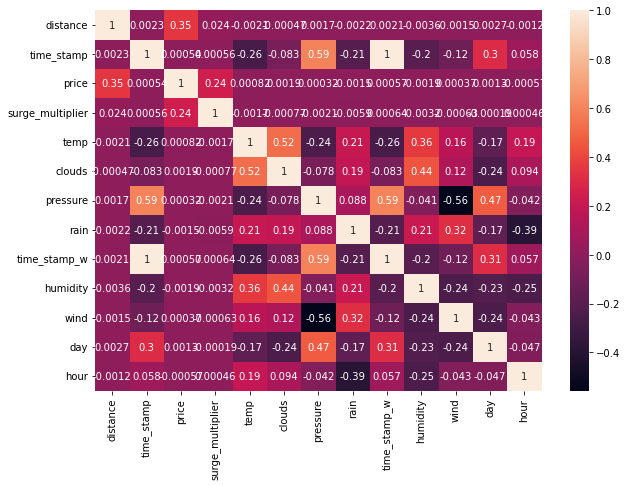

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(new_data.corr(),annot =True)

<function matplotlib.pyplot.show(close=None, block=None)>

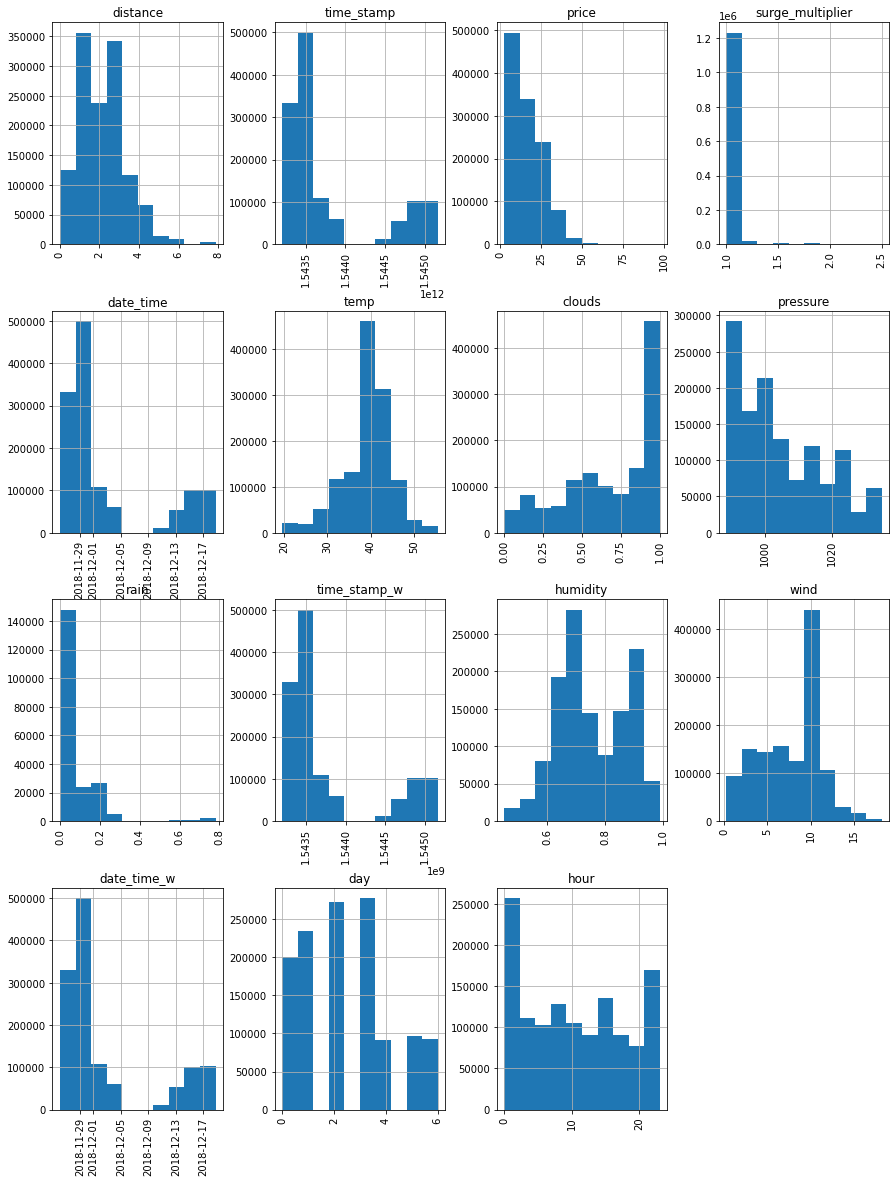

In [134]:
new_data.hist(figsize=(15,20),xrot = 90)
plt.show

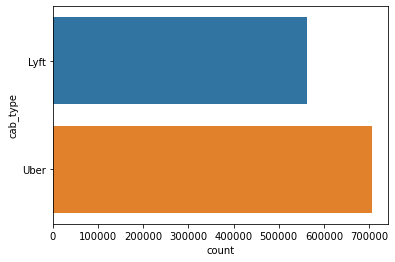

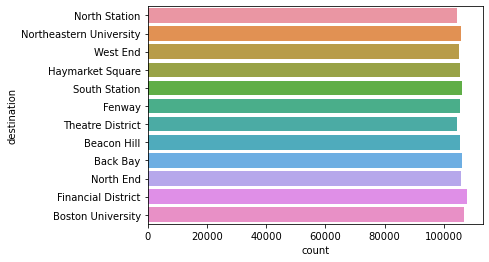

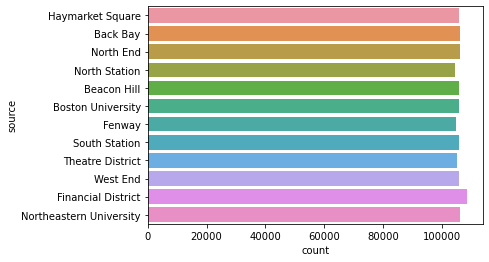

In [23]:
col=['cab_type', 'destination','source']
for features in col:
    sns.countplot(y=features, data=new_data)
    plt.show()

## Feature Selection

Feature selection is an important aspect in model building. Selecting important features results in better accuracy of the model. In this case we'll selecting features which has much effect on surge multplier. So taking this into consideration the selected features are stored in the x-variable

In [24]:
new_data.corr().surge_multiplier

distance            0.024212
time_stamp          0.000559
price               0.240693
surge_multiplier    1.000000
temp               -0.001699
clouds             -0.000771
pressure           -0.002099
rain               -0.005921
time_stamp_w        0.000642
humidity           -0.003231
wind               -0.000630
day                -0.000188
hour                0.000459
Name: surge_multiplier, dtype: float64

In [25]:
new_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [26]:
new_data=new_data.drop(['time_stamp','id','product_id','date_time','merge_date','location','time_stamp_w','date_time_w','merge_date_w'], axis=1)

In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268618 entries, 0 to 693070
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   distance          1268618 non-null  float64
 1   cab_type          1268618 non-null  object 
 2   destination       1268618 non-null  object 
 3   source            1268618 non-null  object 
 4   price             1167709 non-null  float64
 5   surge_multiplier  1268618 non-null  float64
 6   name              1268618 non-null  object 
 7   temp              1265654 non-null  float64
 8   clouds            1265654 non-null  float64
 9   pressure          1265654 non-null  float64
 10  rain              206941 non-null   float64
 11  humidity          1265654 non-null  float64
 12  wind              1265654 non-null  float64
 13  day               1268618 non-null  int64  
 14  hour              1268618 non-null  int64  
dtypes: float64(9), int64(2), object(4)
memory usage: 1

In [28]:
new_data.shape

(1268618, 15)

In [29]:
new_data.columns

Index(['distance', 'cab_type', 'destination', 'source', 'price',
       'surge_multiplier', 'name', 'temp', 'clouds', 'pressure', 'rain',
       'humidity', 'wind', 'day', 'hour'],
      dtype='object')

In [30]:
new_data=new_data.drop(['cab_type','destination','source','price','name'],axis=1)

In [31]:
new_data = new_data.dropna(axis = 0)

In [32]:
x = new_data.drop(['surge_multiplier'],axis=1)
y = new_data['surge_multiplier']

So with these selected features we'll be build our model

In [33]:
x.head()

,distance,temp,clouds,pressure,rain,humidity,wind,day,hour
1,0.44,44.31,1.00,1003.17,0.1123,0.90,13.69,1,2
1,0.44,43.82,0.99,1002.59,0.0997,0.89,11.57,1,2
9,1.08,44.56,0.99,990.78,0.0213,0.96,5.87,1,10
9,1.08,44.95,0.99,990.87,0.0087,0.97,6.14,1,10
15,1.11,42.36,1.00,1012.15,0.2088,0.77,11.46,6,23


In [34]:
x.shape

(206941, 9)

In [35]:
x.isnull().sum()

distance    0
temp        0
clouds      0
pressure    0
rain        0
humidity    0
wind        0
day         0
hour        0
dtype: int64

In [36]:
y

1         1.0
1         1.0
9         1.0
9         1.0
15        1.0
         ... 
693054    1.0
693055    1.0
693056    1.0
693057    1.0
693058    1.0
Name: surge_multiplier, Length: 206941, dtype: float64

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [38]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
col=x.columns

In [40]:
x.shape

(206941, 9)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [42]:
x_train.shape

(155205, 9)

In [43]:
y_train.shape

(155205,)

In [44]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique,counts)))

{0: 150882, 1: 2341, 2: 1034, 3: 500, 4: 427, 5: 21}


In [45]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced")
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score, f1_score
f1_score(y_test, y_pred, average='weighted')

0.9628832077838841

In [47]:
accuracy_score(y_test, y_pred)

0.9561427246018247

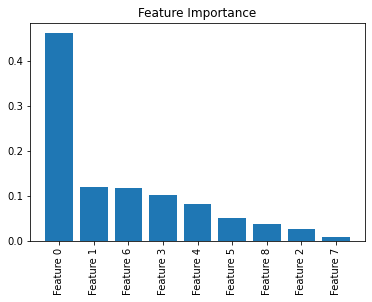

In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [f'Feature {i}' for i in range(x.shape[1])]
names = np.array(names)
names = names[indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()


In [48]:
feature_list=['distance','temp','clouds','pressure','rain','humidity','wind','day','hour']

In [50]:
importances=list(model.feature_importances_)

In [51]:
feature_importances=[(feature, round(importance,2)) for feature, importance in zip(feature_list,importances)]

In [52]:
feature_importances=sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [53]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: distance             Importance: 0.46
Variable: temp                 Importance: 0.12
Variable: wind                 Importance: 0.12
Variable: pressure             Importance: 0.1
Variable: rain                 Importance: 0.08
Variable: humidity             Importance: 0.05
Variable: hour                 Importance: 0.04
Variable: clouds               Importance: 0.03
Variable: day                  Importance: 0.01


[None, None, None, None, None, None, None, None, None]

In [54]:
feature_importances

[('distance', 0.46),
 ('temp', 0.12),
 ('wind', 0.12),
 ('pressure', 0.1),
 ('rain', 0.08),
 ('humidity', 0.05),
 ('hour', 0.04),
 ('clouds', 0.03),
 ('day', 0.01)]

In [55]:
features=[]
importance=[]
for i in range(len(feature_importances)):
    features.append(feature_importances[i][0])
    importance.append(feature_importances[i][1])

<AxesSubplot:>

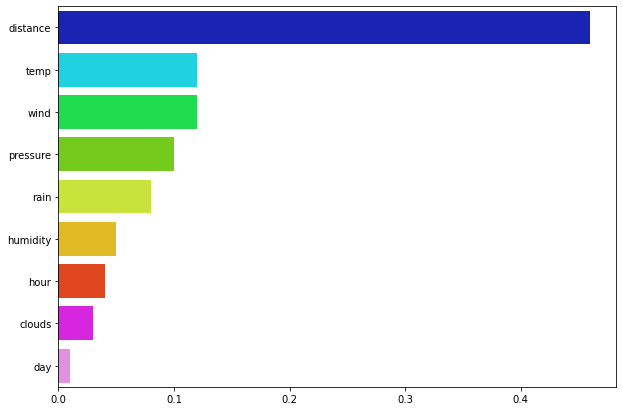

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x=importance, y=features,
            palette="gist_ncar")